In [1]:
!pip install --upgrade s3fs
!pip install osmnx --upgrade

  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.3 MB/s eta 0:00:00a 0:00:01
Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 1.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.2 MB/s eta 0:00:00a 0:00:01


In [2]:
import fsspec
import h5py

file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"

with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        print("✅ File Opened Successfully!")

        # List available groups/datasets
        for key in f.keys():
            print(f"📂 Available Group: {key}")

        # Check sub-datasets within groups
        for key in f.keys():
            print(f"🔍 Exploring '{key}' ...")
            if isinstance(f[key], h5py.Group):
                print(f"    📁 Group '{key}' contains:", list(f[key].keys()))
            else:
                print(f"    🔢 Dataset '{key}' found!")



✅ File Opened Successfully!
📂 Available Group: 1. README
📂 Available Group: 2. Resources
📂 Available Group: 3. Data
🔍 Exploring '1. README' ...
    🔢 Dataset '1. README' found!
🔍 Exploring '2. Resources' ...
    📁 Group '2. Resources' contains: ['2.1. Building Models', '2.2. Weather Files']
🔍 Exploring '3. Data' ...
    📁 Group '3. Data' contains: ['3.1. Metadata', '3.2. Timeseries']


In [3]:
!pip show h5py fsspec

Name: h5py
Version: 3.13.0
Summary: Read and write HDF5 files from Python
Home-page: https://www.h5py.org/
Author: 
Author-email: Andrew Collette <andrew.collette@gmail.com>
License: BSD-3-Clause
Location: /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages
Requires: numpy
Required-by: 
---
Name: fsspec
Version: 2025.3.2
Summary: File-system specification
Home-page: https://github.com/fsspec/filesystem_spec
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2018, Martin Durant
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials

In [4]:
!pip install fsspec

In [5]:
!conda install -c conda-forge fsspec -y


zsh:1: command not found: conda


In [6]:
import h5py
import fsspec

# File path from S3
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"

# Open the file
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        print("✅ File Opened Successfully!")
        
        # Access the Resources group
        resources = f["2. Resources"]
        
        # Get subgroups under Resources: Building Models and Weather Files
        building_models = resources["2.1. Building Models"]
        weather_files = resources["2.2. Weather Files"]
        
        # Print dataset names in Building Models subgroup
        print("\n📂 Datasets in 'Building Models':")
        for dataset_name in building_models.keys():
            print(f"- {dataset_name}")
        
        # Print dataset names in Weather Files subgroup
        print("\n📂 Datasets in 'Weather Files':")
        for dataset_name in weather_files.keys():
            print(f"- {dataset_name}")
        
        # Access the Data group
        data = f["3. Data"]
        
        # Get subgroups under Data: Metadata and Timeseries
        metadata = data["3.1. Metadata"]
        timeseries = data["3.2. Timeseries"]
        
        # Print dataset names in Metadata subgroup
        print("\n📂 Datasets in 'Metadata':")
        for dataset_name in metadata.keys():
            print(f"- {dataset_name}")
        
        # Print dataset names in Timeseries subgroup
        print("\n📂 Datasets in 'Timeseries':")
        for dataset_name in timeseries.keys():
            print(f"- {dataset_name}")

✅ File Opened Successfully!

📂 Datasets in 'Building Models':
- MediumOfficeDetailed_90.1-2013_1A_High_efficiency.osm
- MediumOfficeDetailed_90.1-2013_1A_Low_efficiency.osm
- MediumOfficeDetailed_90.1-2013_1A_Standard_efficiency.osm
- MediumOfficeDetailed_90.1-2013_3C_High_efficiency.osm
- MediumOfficeDetailed_90.1-2013_3C_Low_efficiency.osm
- MediumOfficeDetailed_90.1-2013_3C_Standard_efficiency.osm
- MediumOfficeDetailed_90.1-2013_5A_High_efficiency.osm
- MediumOfficeDetailed_90.1-2013_5A_Low_efficiency.osm
- MediumOfficeDetailed_90.1-2013_5A_Standard_efficiency.osm

📂 Datasets in 'Weather Files':
- 1A
- 3C
- 5A

📂 Datasets in 'Metadata':
- brick_relationhsips.json
- brick_relationhsips.ttl

📂 Datasets in 'Timeseries':
- 1A
- 3C
- 5A


In [7]:
import h5py
import fsspec

# File path from S3
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"

# Open the HDF5 file and list top-level groups
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        print("✅ File Opened Successfully!")
        
        # List all groups (top-level)
        print("\n📂 Available Groups:")
        for group in f.keys():
            print(f"- {group}")


✅ File Opened Successfully!

📂 Available Groups:
- 1. README
- 2. Resources
- 3. Data


In [8]:
# Open the HDF5 file and explore time series datasets
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        print("\n📂 Exploring 'Timeseries' Data:")
        
        # Access the Timeseries group
        timeseries = f["3. Data/3.2. Timeseries"]
        
        # List all time series datasets available
        print("\n🔍 Available Time Series Datasets:")
        for dataset_name in timeseries.keys():
            print(f"- {dataset_name}")



📂 Exploring 'Timeseries' Data:

🔍 Available Time Series Datasets:
- 1A
- 3C
- 5A


In [9]:
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        group_name = "3. Data/3.2. Timeseries/1A"  # Modify for other groups

        if group_name in f:
            group = f[group_name]

            print(f"\n📂 Listing Datasets Inside: {group_name}")
            for key in group.keys():
                print(f"📌 {key}")  # Print each dataset name inside the group
        else:
            print(f"❌ Group '{group_name}' not found in the file.")




📂 Listing Datasets Inside: 3. Data/3.2. Timeseries/1A
📌 High
📌 Low
📌 Standard


In [10]:
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        group_path = "3. Data/3.2. Timeseries/1A/Standard"  # Adjust this if needed

        if group_path in f:
            group = f[group_path]

            # List all datasets inside 'Standard'
            print(f"\n📂 Listing Datasets Inside: {group_path}")
            for dataset_name in group.keys():
                print(f"📌 {dataset_name}")  # Print dataset names
        else:
            print(f"❌ Group '{group_path}' not found in the file.")




📂 Listing Datasets Inside: 3. Data/3.2. Timeseries/1A/Standard
📌 1976
📌 1977
📌 1978
📌 1979
📌 1980
📌 1981
📌 1982
📌 1983
📌 1984
📌 1985
📌 1986
📌 1987
📌 1988
📌 1989
📌 1990
📌 1991
📌 1992
📌 1993
📌 1994
📌 1995
📌 1996
📌 1997
📌 1998
📌 1999
📌 2000
📌 2001
📌 2002
📌 2003
📌 2004
📌 2005
📌 TMY3


In [11]:
year_to_explore = "2005"  # Change this if needed

with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        year_path = f"3. Data/3.2. Timeseries/1A/Standard/{year_to_explore}"

        if year_path in f:
            year_group = f[year_path]

            # List all datasets inside the selected year
            print(f"\n📂 Listing Datasets Inside: {year_path}")
            for dataset_name in year_group.keys():
                print(f"📌 {dataset_name}")  # Print dataset names
        else:
            print(f"❌ Group '{year_path}' not found in the file.")



📂 Listing Datasets Inside: 3. Data/3.2. Timeseries/1A/Standard/2005
📌 run_1
📌 run_2
📌 run_3
📌 run_4
📌 run_5


In [173]:
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        dataset_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/CoolingElectricity"

        if dataset_path in f:
            dataset_group = f[dataset_path]

            print(f"\n📂 Listing Datasets Inside: {dataset_path}")
            for sub_dataset in dataset_group.keys():
                print(f"📌 {sub_dataset}")  # Print names of datasets inside
        else:
            print(f"❌ Dataset '{dataset_path}' not found in the file.")



📂 Listing Datasets Inside: 3. Data/3.2. Timeseries/1A/Standard/2005/run_1/CoolingElectricity
📌 axis0
📌 axis1
📌 block0_items
📌 block0_values
📌 block1_items
📌 block1_values


In [13]:
import h5py
import fsspec

# File path from S3
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"

# Set dataset path for 'ElectricityFacility'
dataset_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ElectricityFacility"

# Open HDF5 file
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        if dataset_path in f:
            dataset_group = f[dataset_path]

            print(f"\n📂 Listing Datasets Inside: {dataset_path}")
            for sub_dataset in dataset_group.keys():
                print(f"📌 {sub_dataset}")  # Print names of datasets inside
        else:
            print(f"❌ Dataset '{dataset_path}' not found in the file.")



📂 Listing Datasets Inside: 3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ElectricityFacility
📌 axis0
📌 axis1
📌 block0_items
📌 block0_values
📌 block1_items
📌 block1_values


In [14]:
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        dataset_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/AirSystemOutdoorAirEconomizerStatus"
        
        print(f"\n📂 Exploring datasets inside: {dataset_path}\n")

        for sub_dataset in ["axis0", "axis1", "block0_items", "block0_values", "block1_items", "block1_values"]:
            if f"{dataset_path}/{sub_dataset}" in f:
                data = f[f"{dataset_path}/{sub_dataset}"][:5]  # Get first 5 rows
                print(f"\n🔍 {sub_dataset} (First 5 rows):")
                print(data)
            else:
                print(f"❌ {sub_dataset} not found.")


📂 Exploring datasets inside: 3. Data/3.2. Timeseries/1A/Standard/2005/run_1/AirSystemOutdoorAirEconomizerStatus


🔍 axis0 (First 5 rows):
[b'Zone Timestep'
 b'21 ZONE PVAV:Air System Outdoor Air Economizer Status[]'
 b'21 ZONE PVAV 1:Air System Outdoor Air Economizer Status[]'
 b'23 ZONE PVAV:Air System Outdoor Air Economizer Status[]']

🔍 axis1 (First 5 rows):
[0 1 2 3 4]

🔍 block0_items (First 5 rows):
[b'Zone Timestep']

🔍 block0_values (First 5 rows):
[array([128,   4, 149, ..., 148,  98,  46], dtype=uint8)]

🔍 block1_items (First 5 rows):
[b'21 ZONE PVAV:Air System Outdoor Air Economizer Status[]'
 b'21 ZONE PVAV 1:Air System Outdoor Air Economizer Status[]'
 b'23 ZONE PVAV:Air System Outdoor Air Economizer Status[]']

🔍 block1_values (First 5 rows):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [15]:
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        dataset_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/CoolingElectricity"
        
        print(f"\n📂 Exploring datasets inside: {dataset_path}\n")

        for sub_dataset in ["axis0", "axis1", "block0_items", "block0_values", "block1_items", "block1_values"]:
            if f"{dataset_path}/{sub_dataset}" in f:
                data = f[f"{dataset_path}/{sub_dataset}"][:5]  # Get first 5 rows
                print(f"\n🔍 {sub_dataset} (First 5 rows):")
                print(data)
            else:
                print(f"❌ {sub_dataset} not found.")



📂 Exploring datasets inside: 3. Data/3.2. Timeseries/1A/Standard/2005/run_1/CoolingElectricity


🔍 axis0 (First 5 rows):
[b'Zone Timestep' b'Cooling:Electricity[J]']

🔍 axis1 (First 5 rows):
[0 1 2 3 4]

🔍 block0_items (First 5 rows):
[b'Zone Timestep']

🔍 block0_values (First 5 rows):
[array([128,   4, 149, ..., 148,  98,  46], dtype=uint8)]

🔍 block1_items (First 5 rows):
[b'Cooling:Electricity[J]']

🔍 block1_values (First 5 rows):
[[ 1053176.9409142 ]
 [10290842.42724968]
 [10030416.50788049]
 [ 6316911.11944292]
 [ 3856421.54510231]]


Explanation of Variables

Variable	                                            Description

AirSystemOutdoorAirEconomizerStatus	                    Shows if the outdoor air economizer is active (Boolean: 0/1)
CoolingElectricity                                      Electricity used by cooling systems (Joules)
ElectricityFacility	                                    Total electricity consumption of the facility (Joules)
ElectricityHVAC	                                        Electricity consumed by HVAC systems (Joules)
ExteriorLightsElectricity	                            Electricity used for exterior lighting (Joules)
FanAirMassFlowRate	                                    Air mass flow rate through fans (kg/s)
FanElectricPower	                                    Power consumed by fans (Watts)
FansElectricity	                                        Total electricity used by fans (Joules)
GasFacility	                                            Total gas consumption in the building (Joules)
GasHVAC	                                                Gas consumption by HVAC systems (Joules)
HeatingElectricity	                                    Electricity used for heating (Joules)
InteriorEquipmentElectricity	                        Electricity used by internal equipment (Joules)
InteriorLightsElectricity	                            Electricity used by interior lighting (Joules)
PumpElectricPower	                                    Power used by pumps (Watts)
PumpMassFlowRate	                                    Mass flow rate of pump systems (kg/s)
PumpsElectricity	                                    Electricity consumption of pumps (Joules)
SiteDayTypeIndex	                                    Index indicating the type of day (weekday/weekend)
SiteHorizontalInfraredRadiationRateperArea	            Infrared radiation per unit area (W/m²)
SiteOutdoorAirDewpointTemperature	                    Dewpoint temperature outside (°C)
SiteOutdoorAirDrybulbTemperature	                    Outdoor air temperature (°C)
SiteOutdoorAirRelativeHumidity	                        Relative humidity outside (%)
SiteOutdoorAirWetbulbTemperature	                    Wet bulb temperature (°C)
SystemNodeMassFlowRate	                                Mass flow rate in HVAC nodes (kg/s)
SystemNodePressure	                                    Pressure in HVAC system nodes (Pa)
SystemNodeRelativeHumidity	                            Relative humidity at HVAC system nodes (%)
SystemNodeTemperature	                                Temperature at HVAC system nodes (°C)
ZoneAirRelativeHumidity	                                Relative humidity inside building zones (%)
ZoneAirTerminalVAVDamperPosition	                    Position of VAV dampers (0-1 scale)
ZoneElectricEquipmentElectricPower	                    Power used by electric equipment in zones (Watts)
ZoneLightsElectricPower	                                Power used by lights in zones (Watts)
ZoneMeanAirTemperature	                                Mean air temperature inside zones (°C)
ZoneMechanicalVentilationMassFlowRate	                Mass flow rate of mechanical ventilation (kg/s)
ZonePeopleOccupantCount	                                Number of occupants in each zone
ZoneThermostatCoolingSetpointTemperature	            Thermostat cooling setpoint (°C)
ZoneThermostatHeatingSetpointTemperature	            Thermostat heating setpoint (°C)

 Extract & Explore Occupancy Data

 Check for axis0 in All Datasets

In [16]:

import h5py
import fsspec

# File path from S3
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"

# Base path for all datasets in run_1
base_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1"

# Open HDF5 file
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        datasets_with_axis0 = []
        
        # Loop through all datasets in 'run_1'
        for dataset_name in f[base_path].keys():
            dataset_full_path = f"{base_path}/{dataset_name}"
            
            # Check if 'axis0' exists inside this dataset
            if "axis0" in f[dataset_full_path]:
                datasets_with_axis0.append(dataset_name)
        
        # Print results
        print("\n✅ Datasets that contain 'axis0':")
        for dataset in datasets_with_axis0:
            print(f"📌 {dataset}")


KeyboardInterrupt: 

CHECKING WHETHER COLUMNS IN RUN1 HAVE SAME AIXS_0 (TIMESTEPS) OR NOT 

In [180]:
import h5py
import fsspec

# Define the S3 file path and dataset paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupant_axis_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/axis0"
cooling_axis_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/CoolingElectricity/axis0"

# Open the file and read the first few entries from axis0 of both datasets
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        # Extract first 5 time steps for both
        occupant_axis = [t.decode() for t in f[occupant_axis_path][:5]]
        cooling_axis = [t.decode() for t in f[cooling_axis_path][:5]]

occupant_axis, cooling_axis


(['Zone Timestep',
  'CLASSROOM_BOT ZN:Zone People Occupant Count[]',
  'CONFROOM_BOT_1 ZN:Zone People Occupant Count[]',
  'CONFROOM_BOT_2 ZN:Zone People Occupant Count[]',
  'CONFROOM_MID_1 ZN:Zone People Occupant Count[]'],
 ['Zone Timestep', 'Cooling:Electricity[J]'])

In [181]:
import h5py
import fsspec

# File path and dataset paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
cooling_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/CoolingElectricity/axis0"
occupant_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/axis0"
electricity_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ElectricityFacility/axis0"

# Read axis0 from all three datasets
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        axis0_cooling = [x.decode() for x in f[cooling_path][:5]]
        axis0_occupant = [x.decode() for x in f[occupant_path][:5]]
        axis0_electricity = [x.decode() for x in f[electricity_path][:5]]

axis0_cooling, axis0_occupant, axis0_electricity


(['Zone Timestep', 'Cooling:Electricity[J]'],
 ['Zone Timestep',
  'CLASSROOM_BOT ZN:Zone People Occupant Count[]',
  'CONFROOM_BOT_1 ZN:Zone People Occupant Count[]',
  'CONFROOM_BOT_2 ZN:Zone People Occupant Count[]',
  'CONFROOM_MID_1 ZN:Zone People Occupant Count[]'],
 ['Zone Timestep', 'Electricity:Facility[J]'])

In [182]:
import h5py
import fsspec

# File and path
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
axis0_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/axis0"

# Read axis0 values
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        raw_times = f[axis0_path][:5]  # First 5 timestamps
        time_strings = [t.decode() for t in raw_times]

# Print the actual decoded timestamps
print("📅 First 5 Timestamps:")
for t in time_strings:
    print(t)

📅 First 5 Timestamps:
Zone Timestep
CLASSROOM_BOT ZN:Zone People Occupant Count[]
CONFROOM_BOT_1 ZN:Zone People Occupant Count[]
CONFROOM_BOT_2 ZN:Zone People Occupant Count[]
CONFROOM_MID_1 ZN:Zone People Occupant Count[]


In [183]:
import h5py
import fsspec

# File path and dataset
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
time_values_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block0_values"

# Open file and access timestamps
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        timestamps_array = f[time_values_path][0]  # Get the actual array of timestamps
        timestamps = [str(t) for t in timestamps_array[:5]]  # Just convert to string

print("📅 First 5 Actual Timestamps:")
for t in timestamps:
    print(t)



📅 First 5 Actual Timestamps:
128
4
149
17
0


In [184]:
import h5py
import fsspec
import pandas as pd

# Define file and dataset path
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

# Read data
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        data = f[occupancy_path][:]  # shape: (52560, 28)

# Time index creation (10-min interval from Jan 1, 2005)
start_time = pd.Timestamp("2005-01-01 00:00:00")
num_records = data.shape[0]
time_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(num_records)]

# Generate placeholder column names for 28 columns
column_names = [f"Room_{i+1}" for i in range(data.shape[1])]

# Create DataFrame
df = pd.DataFrame(data, columns=column_names)
df["datetime"] = time_index

# Filter last 3 months
df["datetime"] = pd.to_datetime(df["datetime"])
latest_date = df["datetime"].max()
start_date = latest_date - pd.DateOffset(months=3)
latest_3_months = df[df["datetime"] >= start_date].reset_index(drop=True)

# Show output
print("✅ Latest 3 months of occupancy data extracted successfully.")
print(latest_3_months.head())


✅ Latest 3 months of occupancy data extracted successfully.
   Room_1  Room_2  Room_3  Room_4  Room_5  Room_6  Room_7  Room_8  Room_9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   Room_10  ...  Room_20  Room_21  Room_22  Room_23  Room_24  Room_25  \
0      0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   

   Room_26  Room_27  Room_28          

In [185]:
import pandas as pd

# Generate time index: 10-min steps from 2005-01-01
start_time = pd.Timestamp("2005-01-01 00:00:00")
num_intervals = 52560  # 10-minute intervals for 1 year

time_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(num_intervals)]
df_time = pd.DataFrame({"datetime": time_index})

# Extract unique months in "YYYY-MM" format
df_time["month"] = df_time["datetime"].dt.to_period("M")
unique_months = df_time["month"].unique()

# Display the months
print("📅 Available Months in 2005:")
for m in unique_months:
    print(m)

📅 Available Months in 2005:
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12


In [186]:
import h5py
import fsspec
import pandas as pd

# File and dataset path
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

# Load only last 13104 rows (~3 months of 10-min intervals)
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        data = f[occupancy_path][-13104:]  # shape = (13104, 28)

# Generate corresponding timestamps starting from Oct 1, 2005
start_time = pd.Timestamp("2005-10-01 00:00:00")
time_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(len(data))]

# Create DataFrame
df = pd.DataFrame({
    "datetime": time_index,
    "total_occupants": data.sum(axis=1)
})

print(df.head())  # Show first 5 rows

             datetime  total_occupants
0 2005-10-01 00:00:00              0.0
1 2005-10-01 00:10:00              0.0
2 2005-10-01 00:20:00              0.0
3 2005-10-01 00:30:00              0.0
4 2005-10-01 00:40:00              0.0


In [187]:
import h5py
import fsspec
import pandas as pd

# Define file and dataset paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

# Load only the last 13,104 rows (≈ 3 months at 10-min intervals)
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        data = f[occupancy_path][-13104:]  # shape: (13104, 28)

# Generate datetime index for 3 months starting from 2005-10-01
start_time = pd.Timestamp("2005-10-01 00:00:00")
time_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(data.shape[0])]

# Sum across all rooms to get total occupants per timestamp
total_occupants = data.sum(axis=1)

# Create final DataFrame
df = pd.DataFrame({
    "datetime": time_index,
    "total_occupants": total_occupants
})

# Show first few rows
print("✅ Latest 3 months of total occupant counts extracted successfully:")
print(df.head(40))


✅ Latest 3 months of total occupant counts extracted successfully:
              datetime  total_occupants
0  2005-10-01 00:00:00              0.0
1  2005-10-01 00:10:00              0.0
2  2005-10-01 00:20:00              0.0
3  2005-10-01 00:30:00              0.0
4  2005-10-01 00:40:00              0.0
5  2005-10-01 00:50:00              0.0
6  2005-10-01 01:00:00              0.0
7  2005-10-01 01:10:00              0.0
8  2005-10-01 01:20:00              0.0
9  2005-10-01 01:30:00              0.0
10 2005-10-01 01:40:00              0.0
11 2005-10-01 01:50:00              0.0
12 2005-10-01 02:00:00              0.0
13 2005-10-01 02:10:00              0.0
14 2005-10-01 02:20:00              0.0
15 2005-10-01 02:30:00              0.0
16 2005-10-01 02:40:00              0.0
17 2005-10-01 02:50:00              0.0
18 2005-10-01 03:00:00              0.0
19 2005-10-01 03:10:00              0.0
20 2005-10-01 03:20:00              0.0
21 2005-10-01 03:30:00              0.0
22 2005-10-01

In [189]:
import h5py
import fsspec
import pandas as pd

# Define file and dataset path
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

# Read the last 3 months of occupancy data
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        data = f[occupancy_path][-13104:]  # shape: (13104, 28)

# Generate corresponding timestamps starting from 2005-10-01
start_time = pd.Timestamp("2005-10-01 00:00:00")
time_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(len(data))]

# Sum occupants across all 28 rooms
total_occupants = data.sum(axis=1)

# Create DataFrame
df_total = pd.DataFrame({
    "datetime": time_index,
    "total_occupants": total_occupants
})

# Display first 15 rows
df_total.head(100)


,datetime,total_occupants
0,2005-10-01 00:00:00,0.000000
1,2005-10-01 00:10:00,0.000000
2,2005-10-01 00:20:00,0.000000
3,2005-10-01 00:30:00,0.000000
4,2005-10-01 00:40:00,0.000000
...,...,...
95,2005-10-01 15:50:00,133.849861
96,2005-10-01 16:00:00,126.381741
97,2005-10-01 16:10:00,111.214765
98,2005-10-01 16:20:00,66.781862


In [194]:
import h5py
import fsspec
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define file path and dataset location
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

# Step 1: Read the last 3 months of data (13104 rows)
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy_data = f[occupancy_path][-13104:]  # Shape: (13104, 28)

# Step 2: Generate datetime index starting from 2005-10-01
start_time = pd.Timestamp("2005-10-01 00:00:00")
datetime_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(occupancy_data.shape[0])]

# Step 3: Create training DataFrame
total_occupants = occupancy_data.sum(axis=1)
train_df = pd.DataFrame({
    "datetime": datetime_index,
    "total_occupants": total_occupants
})
train_df["hour"] = train_df["datetime"].dt.hour
train_df["minute"] = train_df["datetime"].dt.minute
train_df["weekday"] = train_df["datetime"].dt.weekday

# Step 4: Prepare test data for Jan 1–7, 2006 (1008 intervals)
future_start = pd.Timestamp("2006-01-01 00:00:00")
future_datetimes = [future_start + pd.Timedelta(minutes=10) * i for i in range(1008)]
future_df = pd.DataFrame({"datetime": future_datetimes})
future_df["hour"] = future_df["datetime"].dt.hour
future_df["minute"] = future_df["datetime"].dt.minute
future_df["weekday"] = future_df["datetime"].dt.weekday

# Step 5: Train model
X_train = train_df[["hour", "minute", "weekday"]]
y_train = train_df["total_occupants"]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict for future
X_future = future_df[["hour", "minute", "weekday"]]
future_df["predicted_occupants"] = model.predict(X_future)

# Show first 15 predictions
future_df[["datetime", "predicted_occupants"]].tail(50)


,datetime,predicted_occupants
0,2006-01-01 00:00:00,0.0
1,2006-01-01 00:10:00,0.0
2,2006-01-01 00:20:00,0.0
3,2006-01-01 00:30:00,0.0
4,2006-01-01 00:40:00,0.0
5,2006-01-01 00:50:00,0.0
6,2006-01-01 01:00:00,0.0
7,2006-01-01 01:10:00,0.0
8,2006-01-01 01:20:00,0.0
9,2006-01-01 01:30:00,0.0


In [195]:
import h5py
import fsspec
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# File path and dataset
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

# Read last 3 months of occupancy data
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        data = f[occupancy_path][-13104:]  # Last 3 months, shape: (13104, 28)

# Create datetime index for last 3 months
start_time = pd.Timestamp("2005-10-01 00:00:00")
time_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(len(data))]

# Total occupants per timestep
total_occupants = data.sum(axis=1)

# Create DataFrame
df = pd.DataFrame({
    "datetime": time_index,
    "total_occupants": total_occupants
})

# Feature Engineering
df["minute"] = df["datetime"].dt.minute
df["hour"] = df["datetime"].dt.hour
df["dayofweek"] = df["datetime"].dt.dayofweek

# Train-test split (use most recent 1 week for testing)
train_df = df.iloc[:-1008]
test_df = df.iloc[-1008:]

X_train = train_df[["minute", "hour", "dayofweek"]]
y_train = train_df["total_occupants"]
X_test = test_df[["minute", "hour", "dayofweek"]]

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
test_df["predicted_occupants"] = model.predict(X_test)

# Show last 50 predictions
test_df[["datetime", "total_occupants", "predicted_occupants"]].tail(50)


/tmp/ipykernel_1848/653156700.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["predicted_occupants"] = model.predict(X_test)


,datetime,total_occupants,predicted_occupants
13054,2005-12-30 15:40:00,0.0,0.0
13055,2005-12-30 15:50:00,0.0,0.0
13056,2005-12-30 16:00:00,0.0,0.0
13057,2005-12-30 16:10:00,0.0,0.0
13058,2005-12-30 16:20:00,0.0,0.0
13059,2005-12-30 16:30:00,0.0,0.0
13060,2005-12-30 16:40:00,0.0,0.0
13061,2005-12-30 16:50:00,0.0,0.0
13062,2005-12-30 17:00:00,0.0,0.0
13063,2005-12-30 17:10:00,0.0,0.0


In [198]:
import h5py
import fsspec

# File path and dataset
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
daytype_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/SiteDayTypeIndex/block1_values"

# Read first 20 values from SiteDayTypeIndex
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        site_daytype = f[daytype_path][:20].flatten()

# Display
print("📅 First 20 SiteDayTypeIndex values:")
print(site_daytype)


📅 First 20 SiteDayTypeIndex values:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [199]:
import h5py
import fsspec
import numpy as np

# File and dataset path
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
daytype_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/SiteDayTypeIndex/block1_values"

# Read all values
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        site_daytype = f[daytype_path][:].flatten()

# Unique values and counts
unique, counts = np.unique(site_daytype, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Type {int(u)}: {c} occurrences")


Type 1: 7632 occurrences
Type 2: 7488 occurrences
Type 3: 7488 occurrences
Type 4: 7488 occurrences
Type 5: 7488 occurrences
Type 6: 7488 occurrences
Type 7: 7488 occurrences


In [201]:
import h5py
import fsspec
import pandas as pd

# File and dataset paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

# Load last 3 months (~13104 rows)
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy = f[occupancy_path][-13104:]  # shape: (13104, 28)

# Create datetime index (10-min intervals starting Oct 1, 2005)
start_time = pd.Timestamp("2005-10-01 00:00:00")
timestamps = [start_time + pd.Timedelta(minutes=10) * i for i in range(occupancy.shape[0])]

# Create DataFrame with total occupants
df = pd.DataFrame({
    "datetime": timestamps,
    "total_occupants": occupancy.sum(axis=1)
})

# Extract just the date
df["date"] = df["datetime"].dt.date

# Group by date and sum
daily_totals = df.groupby("date")["total_occupants"].sum().reset_index()

# Display
print("✅ Total Occupants per Day (Oct–Dec 2005):")
print(daily_totals)


✅ Total Occupants per Day (Oct–Dec 2005):
          date  total_occupants
0   2005-10-01      6920.224359
1   2005-10-02      6826.457581
2   2005-10-03      6830.637334
3   2005-10-04      6837.220904
4   2005-10-05      6864.190355
..         ...              ...
86  2005-12-26      6768.286659
87  2005-12-27      6989.813287
88  2005-12-28      6867.089600
89  2005-12-29         0.000000
90  2005-12-30         0.000000

[91 rows x 2 columns]


In [212]:
import h5py
import fsspec
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Define file and dataset paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"
daytype_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/SiteDayTypeIndex/block1_values"

# Load last 3 months of data (13104 intervals = 3 months of 10-min data)
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy = f[occupancy_path][-13104:]  # shape: (13104, 28)
        day_type = f[daytype_path][-13104:].flatten()  # shape: (13104,)

# Generate datetime index starting from Oct 1, 2005
start_time = pd.Timestamp("2005-10-01 00:00:00")
timestamps = [start_time + pd.Timedelta(minutes=10) * i for i in range(occupancy.shape[0])]

# Create training DataFrame
train_df = pd.DataFrame({
    "datetime": timestamps,
    "total_occupants": occupancy.sum(axis=1),
    "day_type": day_type
})
train_df["hour"] = train_df["datetime"].dt.hour
train_df["minute"] = train_df["datetime"].dt.minute
train_df["weekday"] = train_df["datetime"].dt.weekday

# Prepare future dates: Jan 1 to Jan 7, 2006 (7 days = 1008 intervals)
future_start = pd.Timestamp("2006-01-01 00:00:00")
future_times = [future_start + pd.Timedelta(minutes=10) * i for i in range(1008)]

# Assume same weekday pattern and simulate repeating day_type codes based on weekday
# Weekdays: 0–4 => 1 (Weekday), Weekends: 5–6 => 2 (Weekend)
day_type_simulated = [1 if t.weekday() < 5 else 2 for t in future_times]

future_df = pd.DataFrame({
    "datetime": future_times,
    "day_type": day_type_simulated
})
future_df["hour"] = future_df["datetime"].dt.hour
future_df["minute"] = future_df["datetime"].dt.minute
future_df["weekday"] = future_df["datetime"].dt.weekday

# Train Random Forest model
X_train = train_df[["hour", "minute", "weekday", "day_type"]]
y_train = train_df["total_occupants"]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict future occupancy
X_future = future_df[["hour", "minute", "weekday", "day_type"]]
future_df["predicted_occupants"] = model.predict(X_future)

# Return last 10 predictions for review
future_df[["datetime", "predicted_occupants"]].tail(50)


,datetime,predicted_occupants
958,2006-01-07 15:40:00,125.150876
959,2006-01-07 15:50:00,124.856652
960,2006-01-07 16:00:00,123.628557
961,2006-01-07 16:10:00,117.790237
962,2006-01-07 16:20:00,98.289181
963,2006-01-07 16:30:00,81.834083
964,2006-01-07 16:40:00,74.263268
965,2006-01-07 16:50:00,72.106209
966,2006-01-07 17:00:00,73.381009
967,2006-01-07 17:10:00,63.008202


In [204]:
# Quick sanity check of daily classification
day_counts = df[["date", "day_type"]].drop_duplicates().groupby("day_type").count()
print(day_counts)


          date
day_type      
Holiday     13
Weekday     65
Weekend     13


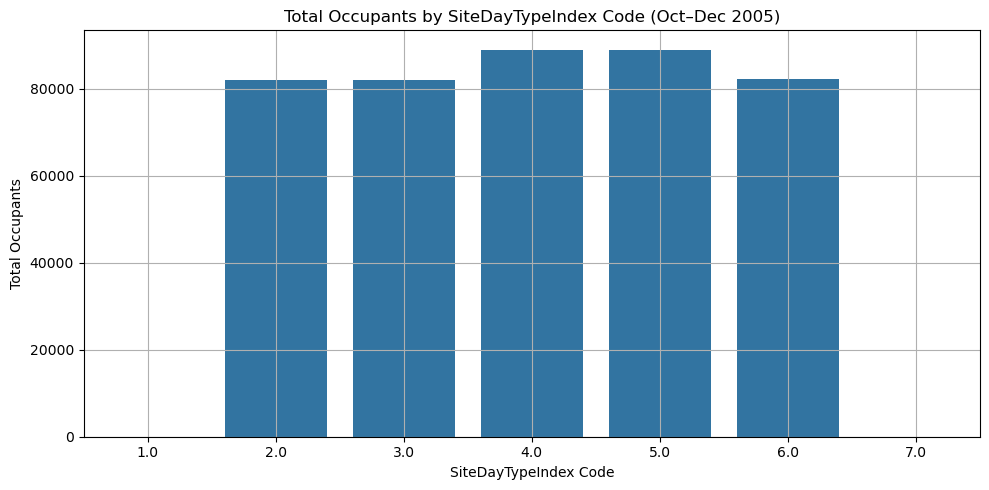

,day_type_code,total_intervals,total_occupants
0,1.0,1872,0.000000
1,2.0,1872,82155.378959
2,3.0,1872,82142.696315
3,4.0,1872,89004.464874
4,5.0,1872,89040.354475
5,6.0,1872,82195.226306
6,7.0,1872,0.000000


In [277]:
import h5py
import fsspec
import pandas as pd
import numpy as np

# File paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"
daytype_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/SiteDayTypeIndex/block1_values"

# Load last 13104 rows of data (approx. Oct–Dec 2005)
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy_data = f[occupancy_path][-13104:]  # shape: (13104, 28)
        daytype_data = f[daytype_path][-13104:].flatten()  # shape: (13104,)

# Create datetime index
start_time = pd.Timestamp("2005-10-01 00:00:00")
datetime_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(13104)]

# Total occupants per time step
total_occupants = occupancy_data.sum(axis=1)

# Create DataFrame
df = pd.DataFrame({
    "datetime": datetime_index,
    "total_occupants": total_occupants,
    "day_type_code": daytype_data
})

# Group by SiteDayTypeIndex to explore mappings
mapping_summary = df.groupby("day_type_code").agg(
    total_intervals=("datetime", "count"),
    total_occupants=("total_occupants", "sum")
).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

# Plot occupancy patterns by SiteDayTypeIndex
plt.figure(figsize=(10, 5))
sns.barplot(data=mapping_summary, x="day_type_code", y="total_occupants")
plt.title("Total Occupants by SiteDayTypeIndex Code (Oct–Dec 2005)")
plt.xlabel("SiteDayTypeIndex Code")
plt.ylabel("Total Occupants")
plt.grid(True)
plt.tight_layout()
plt.show()

mapping_summary.sort_values("day_type_code")


(b) Hourly Avg Occupants
X-axis: Hours of the day (0–23).
Y-axis: Average number of occupants.
Insight:
Occupancy starts increasing around 7–8 AM.
Peaks between 9 AM to 4 PM.
Lunch dip around 12 PM.
Drops off to near 0 after 6 PM.
Indicates a typical office working schedule.

Including features to predict one week ahead occupants
✅ ZonePeopleOccupantCount → Occupancy-based features
✅ SiteDayTypeIndex → Time feature (weekday/weekend/holiday)
✅ ZoneThermostatHeatingSetpointTemperature, ZoneThermostatCoolingSetpointTemperature, ZoneMeanAirTemperature, ZoneAirRelativeHumidity → Can act as internal environmental conditions
✅ Weather-related:
SiteOutdoorAirDrybulbTemperature
SiteOutdoorAirDewpointTemperature
SiteOutdoorAirWetbulbTemperature
SiteOutdoorAirRelativeHumidity
SiteHorizontalInfraredRadiationRateperArea


In [226]:
import h5py
import fsspec
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
base_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/"

# Target and feature paths
paths = {
    "occupancy": base_path + "ZonePeopleOccupantCount/block1_values",
    "day_type": base_path + "SiteDayTypeIndex/block1_values",
    "heating_setpoint": base_path + "ZoneThermostatHeatingSetpointTemperature/block1_values",
    "cooling_setpoint": base_path + "ZoneThermostatCoolingSetpointTemperature/block1_values",
    "mean_air_temp": base_path + "ZoneMeanAirTemperature/block1_values",
    "zone_rh": base_path + "ZoneAirRelativeHumidity/block1_values",
    "drybulb_temp": base_path + "SiteOutdoorAirDrybulbTemperature/block1_values",
    "dewpoint_temp": base_path + "SiteOutdoorAirDewpointTemperature/block1_values",
    "wetbulb_temp": base_path + "SiteOutdoorAirWetbulbTemperature/block1_values",
    "outdoor_rh": base_path + "SiteOutdoorAirRelativeHumidity/block1_values",
    "infrared_radiation": base_path + "SiteHorizontalInfraredRadiationRateperArea/block1_values"
}

# Load data
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        data = {k: f[v][-13104:].mean(axis=1) if f[v].ndim == 2 else f[v][-13104:].flatten() for k, v in paths.items()}

# Create datetime index
start_time = pd.Timestamp("2005-10-01 00:00:00")
datetime_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(13104)]

# Create DataFrame
df = pd.DataFrame({
    "datetime": datetime_index,
    "total_occupants": data["occupancy"],
    "day_type_code": data["day_type"],
    "heating_setpoint": data["heating_setpoint"],
    "cooling_setpoint": data["cooling_setpoint"],
    "mean_air_temp": data["mean_air_temp"],
    "zone_rh": data["zone_rh"],
    "drybulb_temp": data["drybulb_temp"],
    "dewpoint_temp": data["dewpoint_temp"],
    "wetbulb_temp": data["wetbulb_temp"],
    "outdoor_rh": data["outdoor_rh"],
    "infrared_radiation": data["infrared_radiation"]
})

# Add time-based features
df["hour"] = df["datetime"].dt.hour
df["minute"] = df["datetime"].dt.minute

# Filter for working days only
df = df[df["day_type_code"].isin([1, 2, 3, 4, 5])].copy()

df.head()


,datetime,total_occupants,day_type_code,heating_setpoint,cooling_setpoint,mean_air_temp,zone_rh,drybulb_temp,dewpoint_temp,wetbulb_temp,outdoor_rh,infrared_radiation,hour,minute
0,2005-10-01 00:00:00,0.0,2.0,14.893529,26.771176,23.887162,40.160123,26.416667,25.4,25.677991,94.333333,414.333333,0,0
1,2005-10-01 00:10:00,0.0,2.0,14.893529,26.771176,24.364237,39.328831,26.133333,25.2,25.442739,94.666667,419.666667,0,10
2,2005-10-01 00:20:00,0.0,2.0,14.893529,26.771176,24.602086,39.025161,25.850000,25.0,25.206896,95.000000,425.000000,0,20
3,2005-10-01 00:30:00,0.0,2.0,14.893529,26.771176,24.735836,38.912801,25.566667,24.8,24.970483,95.333333,430.333333,0,30
4,2005-10-01 00:40:00,0.0,2.0,14.893529,26.771176,25.013422,38.780607,25.283333,24.6,24.733475,95.666667,435.666667,0,40


In [230]:
import os

# Save to current directory instead of /mnt/data
output_dir = "."
output_path = os.path.join(output_dir, "working_days_occupancy_features_oct_dec_2005.csv")

# Save the DataFrame
df.to_csv(output_path, index=False)
print(f"✅ File saved to: {output_path}")


✅ File saved to: ./working_days_occupancy_features_oct_dec_2005.csv


In [237]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Compute RMSE manually
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Trained")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.2f}")


✅ Model Trained
📉 RMSE: 0.27
📈 R² Score: 0.98


TAKEAWAYS: model has learned patterns in occupancy based on time and environmental conditions.
With such a high R², it's capturing most of the variability in occupancy. - 0.98

Now, modeling in predicted 2006 how much we predict occupants 

    


In [242]:
import h5py
import fsspec
import pandas as pd
import numpy as np

# File and dataset paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

# Load Jan–Mar 2005 = 3 months = 4464 intervals (10-minute intervals)
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        # Jan–Mar 2005 starts at index 0 and spans 4464 steps
        occupancy = f[occupancy_path][:4464]

# Create datetime index
start_time = pd.Timestamp("2005-01-01 00:00:00")
datetime_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(len(occupancy))]

# Create DataFrame
df = pd.DataFrame({
    "datetime": datetime_index,
    "occupancy": occupancy.sum(axis=1)  # total occupants across zones
})


In [243]:
df["date"] = df["datetime"].dt.date
daily_avg = df.groupby("date")["occupancy"].mean().reset_index()
daily_avg.columns = ["ds", "y"]  # Rename for Prophet


In [245]:
pip install prophet


425411.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 30.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 22.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [247]:
import h5py
import fsspec
import pandas as pd
import numpy as np

# File and dataset paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

# Load full year: 52,560 rows (10-min intervals)
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy = f[occupancy_path][:52560]  # Jan–Dec 2005

# Create datetime index
start_time = pd.Timestamp("2005-01-01 00:00:00")
datetime_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(len(occupancy))]

# Build DataFrame
df = pd.DataFrame({
    "datetime": datetime_index,
    "occupancy": occupancy.sum(axis=1)
})


In [248]:
df["month"] = df["datetime"].dt.month
monthly_avg = df.groupby("month")["occupancy"].mean().reset_index()


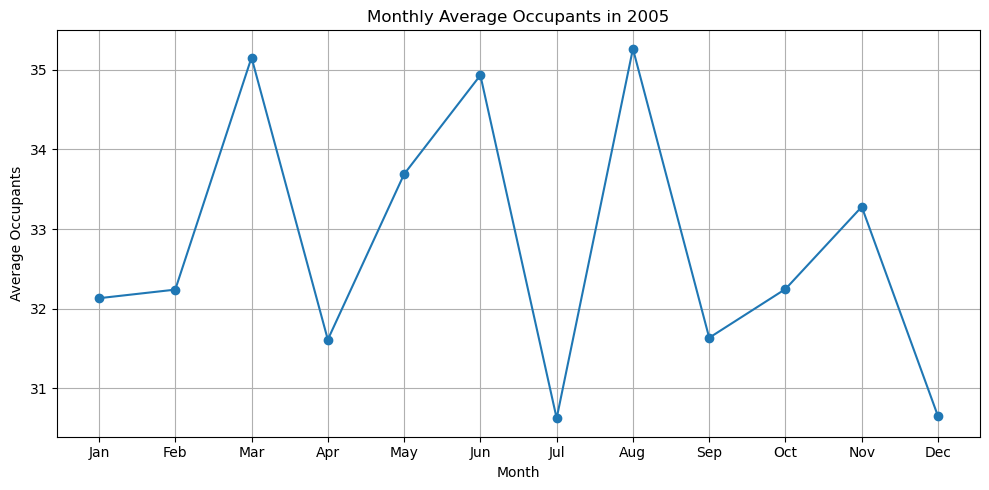

In [249]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg["month"], monthly_avg["occupancy"], marker='o')
plt.title("Monthly Average Occupants in 2005")
plt.xlabel("Month")
plt.ylabel("Average Occupants")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1848/3626815239.py:45: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


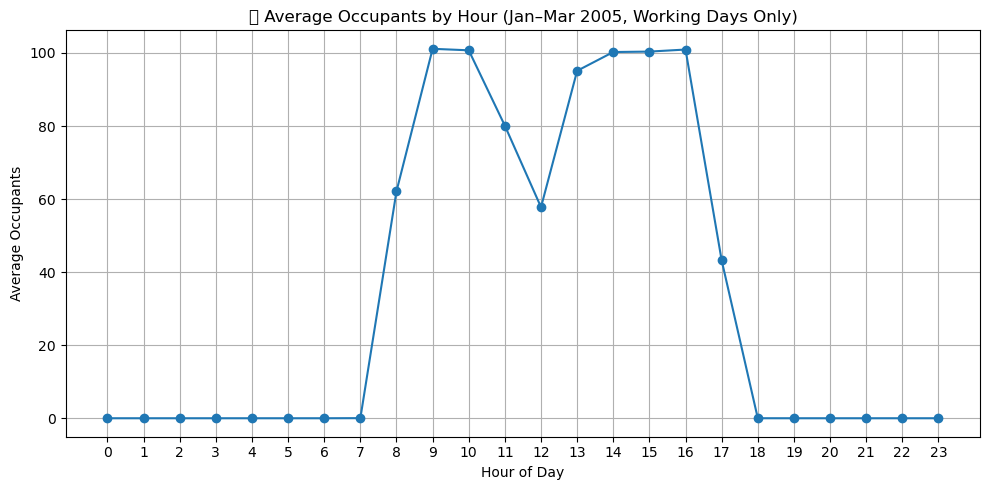

In [252]:
import h5py
import fsspec
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
base_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/"
occupancy_path = base_path + "ZonePeopleOccupantCount/block1_values"
daytype_path = base_path + "SiteDayTypeIndex/block1_values"

# Load first 3 months: 4464 intervals = 91 days * 24 hours * 6 (10-min)
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy = f[occupancy_path][:4464]  # shape: (4464, n_zones)
        daytype = f[daytype_path][:4464].flatten()

# Create datetime index
start_time = pd.Timestamp("2005-01-01 00:00:00")
datetime_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(4464)]

# Build DataFrame
df = pd.DataFrame({
    "datetime": datetime_index,
    "total_occupants": occupancy.sum(axis=1),
    "day_type": daytype
})

# Extract hour and filter weekdays (1 to 5 = working days)
df["hour"] = df["datetime"].dt.hour
df = df[df["day_type"].isin([1, 2, 3, 4, 5])].copy()

# Group by hour of the day to find schedule pattern
hourly_avg = df.groupby("hour")["total_occupants"].mean().reset_index()

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg["hour"], hourly_avg["total_occupants"], marker='o')
plt.title("⏰ Average Occupants by Hour (Jan–Mar 2005, Working Days Only)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Occupants")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


Step	Action
1.	Filter for working days only
2.	Extract occupancy from past (e.g., Jan–Mar 2005)
3.	Apply STL(df["occupants"], period=144)
4.	Get seasonal and trend components
5.	Use avg_trend + seasonal[:144] and repeat for 7 days
6.	Plot prediction and compare to Jan 1–7, 2005 actual

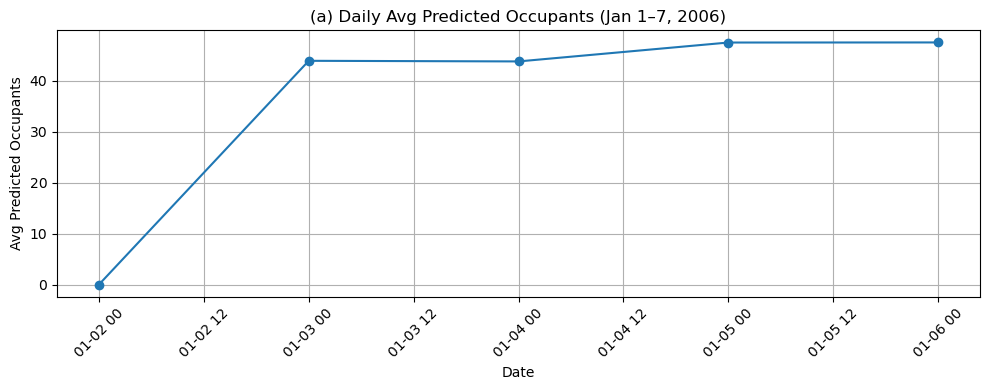

In [224]:
# Convert datetime to date for daily aggregation
future_df["date"] = future_df["datetime"].dt.date

# Group by date and calculate average predicted occupants
daily_avg_pred = future_df.groupby("date")["predicted_occupants"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 4))
plt.plot(daily_avg_pred["date"], daily_avg_pred["predicted_occupants"], marker='o')
plt.title("(a) Daily Avg Predicted Occupants (Jan 1–7, 2006)")
plt.xlabel("Date")
plt.ylabel("Avg Predicted Occupants")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


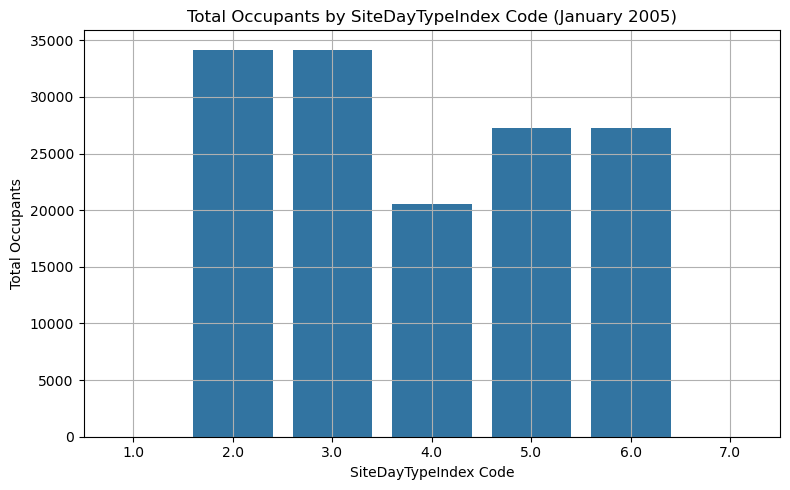

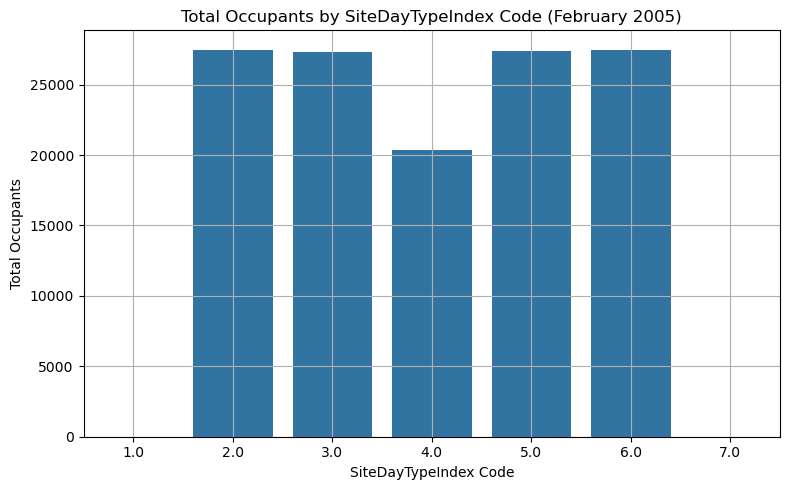

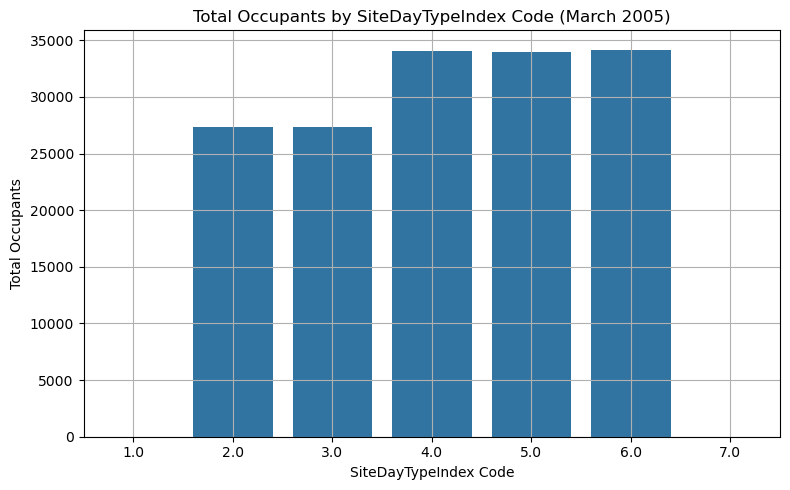

📅 January Summary:
    day_type_code  total_intervals  total_occupants
0            1.0              720         0.000000
1            2.0              720     34156.976815
2            3.0              720     34175.594243
3            4.0              576     20542.318995
4            5.0              576     27294.056931
5            6.0              576     27268.260385
6            7.0              576         0.000000
📅 February Summary:
    day_type_code  total_intervals  total_occupants
0            1.0              576         0.000000
1            2.0              576     27460.362546
2            3.0              576     27311.920514
3            4.0              576     20387.732350
4            5.0              576     27353.261877
5            6.0              576     27477.010268
6            7.0              576         0.000000
📅 March Summary:
    day_type_code  total_intervals  total_occupants
0            1.0              576         0.000000
1            2.0       

In [267]:
import h5py
import fsspec
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"
daytype_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/SiteDayTypeIndex/block1_values"

# Intervals per month
intervals_jan = 31 * 24 * 6
intervals_feb = 28 * 24 * 6
intervals_mar = 31 * 24 * 6

with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy_jan = f[occupancy_path][0:intervals_jan]
        occupancy_feb = f[occupancy_path][intervals_jan:intervals_jan + intervals_feb]
        occupancy_mar = f[occupancy_path][intervals_jan + intervals_feb:intervals_jan + intervals_feb + intervals_mar]
        
        daytype_jan = f[daytype_path][0:intervals_jan].flatten()
        daytype_feb = f[daytype_path][intervals_jan:intervals_jan + intervals_feb].flatten()
        daytype_mar = f[daytype_path][intervals_jan + intervals_feb:intervals_jan + intervals_feb + intervals_mar].flatten()

# Function to build monthly DataFrame
def build_df(start_date, occupancy, daytype):
    datetime_index = pd.date_range(start=start_date, periods=len(daytype), freq="10min")
    return pd.DataFrame({
        "datetime": datetime_index,
        "total_occupants": occupancy.sum(axis=1),
        "day_type_code": daytype
    })

df_jan = build_df("2005-01-01", occupancy_jan, daytype_jan)
df_feb = build_df("2005-02-01", occupancy_feb, daytype_feb)
df_mar = build_df("2005-03-01", occupancy_mar, daytype_mar)

# Group and summarize
def summarize(df, title):
    summary = df.groupby("day_type_code").agg(
        total_intervals=("datetime", "count"),
        total_occupants=("total_occupants", "sum")
    ).reset_index()
    
    plt.figure(figsize=(8, 5))
    sns.barplot(data=summary, x="day_type_code", y="total_occupants")
    plt.title(f"Total Occupants by SiteDayTypeIndex Code ({title})")
    plt.xlabel("SiteDayTypeIndex Code")
    plt.ylabel("Total Occupants")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return summary.sort_values("day_type_code")

# Visualize each month
summary_jan = summarize(df_jan, "January 2005")
summary_feb = summarize(df_feb, "February 2005")
summary_mar = summarize(df_mar, "March 2005")

# Print summaries
print("📅 January Summary:\n", summary_jan)
print("📅 February Summary:\n", summary_feb)
print("📅 March Summary:\n", summary_mar)


/tmp/ipykernel_1848/3152279736.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


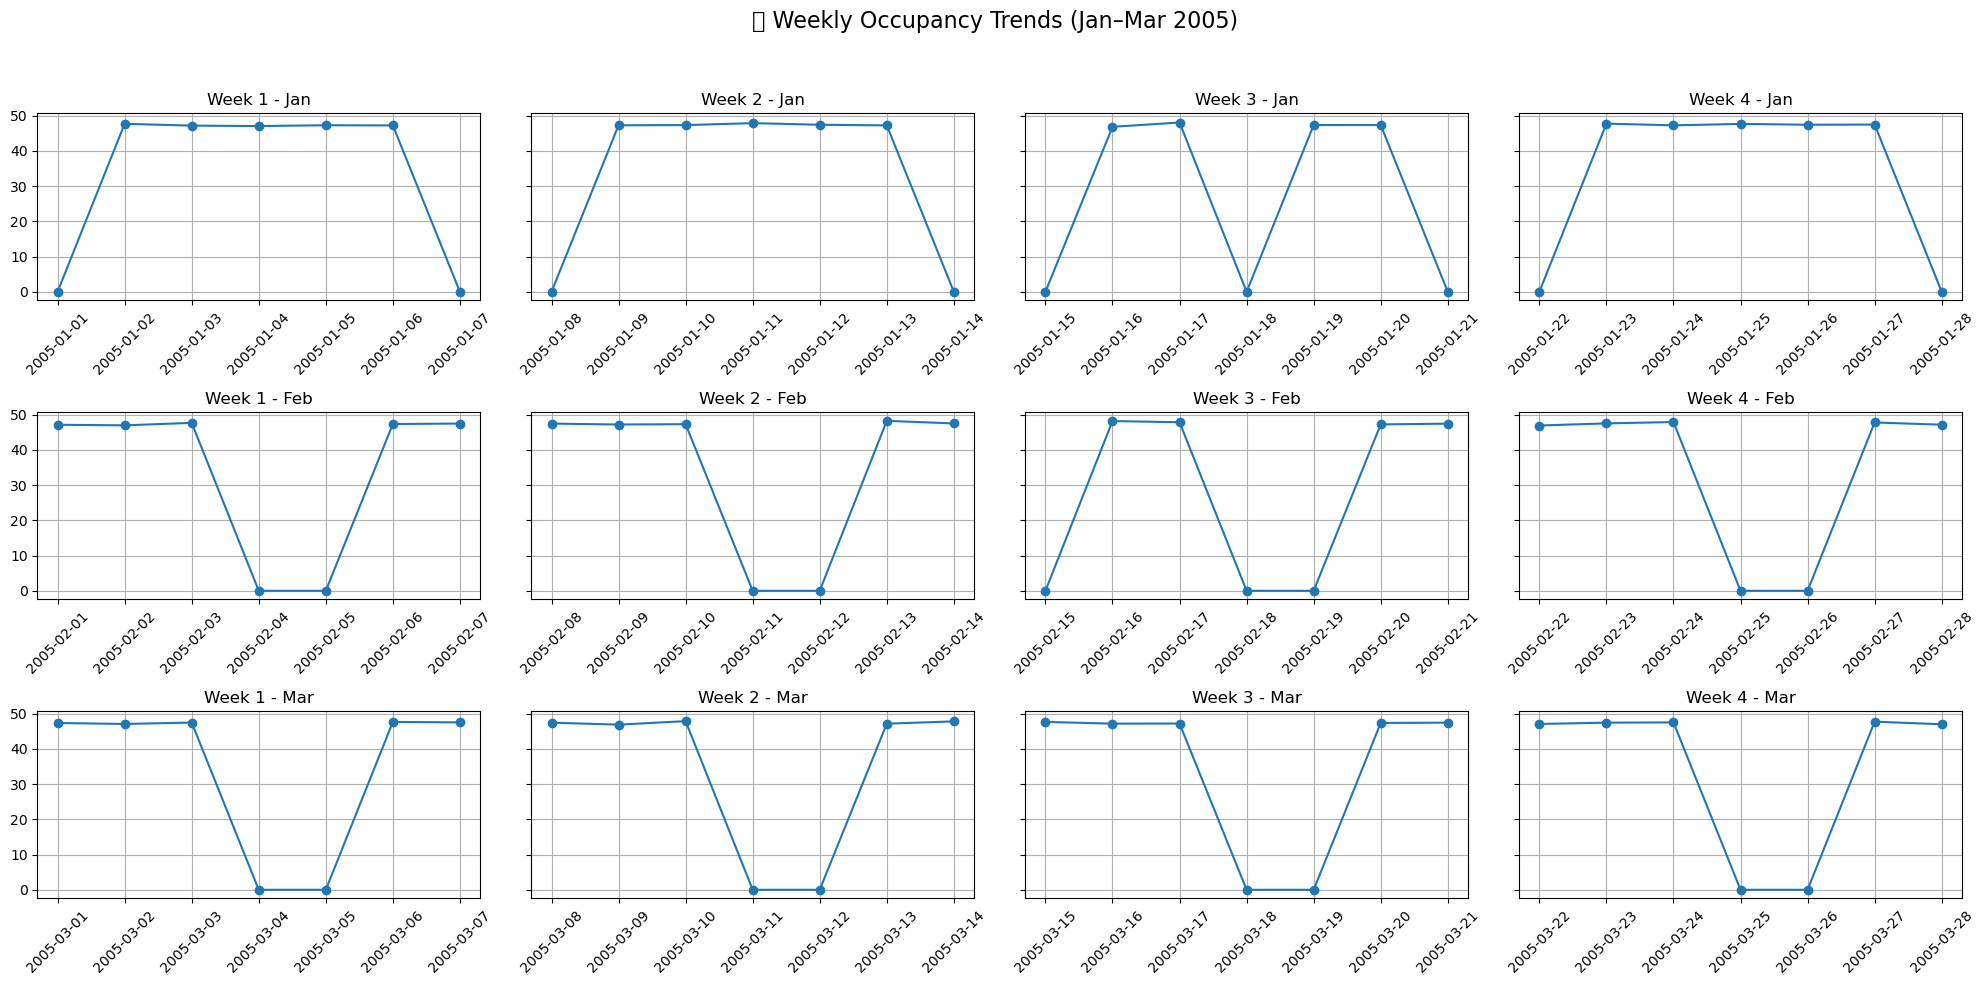

In [269]:
import h5py
import fsspec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from S3 for Jan–Mar 2005 (first 13104 rows)
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy_data = f[occupancy_path][:13104]  # Jan–Mar 2005
        total_occupants = occupancy_data.sum(axis=1)

# Create datetime index
start_time = pd.Timestamp("2005-01-01 00:00:00")
datetime_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(13104)]

# Create DataFrame
df = pd.DataFrame({"datetime": datetime_index, "total_occupants": total_occupants})
df.set_index("datetime", inplace=True)

# Resample to daily mean to ease weekly plotting
df_daily = df.resample("D").mean()

# Create subplots grid
fig, axes = plt.subplots(3, 4, figsize=(20, 10), sharey=True)
fig.suptitle("📊 Weekly Occupancy Trends (Jan–Mar 2005)", fontsize=16)

# Plot each week
for month_idx, month in enumerate(["01", "02", "03"]):
    for week in range(4):
        ax = axes[month_idx, week]
        start_date = f"2005-{month}-{1 + week * 7:02d}"
        end_date = pd.to_datetime(start_date) + pd.Timedelta(days=6)
        week_data = df_daily[start_date:end_date]
        ax.plot(week_data.index, week_data["total_occupants"], marker="o")
        ax.set_title(f"Week {week + 1} - {pd.to_datetime(start_date):%b}")
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Across all weeks, a clear working-day occupancy pattern is visible:

Monday to Friday show high occupancy (≈ 45–50 occupants on average).
Weekends (Saturday & Sunday) drop sharply to near-zero occupancy.
This confirms the building was used only on weekdays, supporting earlier findings.

In [270]:
import h5py
import fsspec
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL

# Load data: Jan 1 – Mar 31, 2005 → 3 months × 31 days max × 144 intervals/day = 13392 approx.
rows = 13392
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occ_data = f[occupancy_path][:rows]  # shape: (rows, 28)

# Step 1A: Create datetime index
start_time = pd.Timestamp("2005-01-01 00:00:00")
datetime_index = pd.date_range(start=start_time, periods=rows, freq="10min")

# Step 1B: Combine into DataFrame
df = pd.DataFrame({
    "datetime": datetime_index,
    "occupants": occ_data.sum(axis=1)  # sum all 28 zones
})
df.set_index("datetime", inplace=True)

# Step 1C: Apply STL decomposition
stl = STL(df['occupants'], period=144, robust=True)
result = stl.fit()


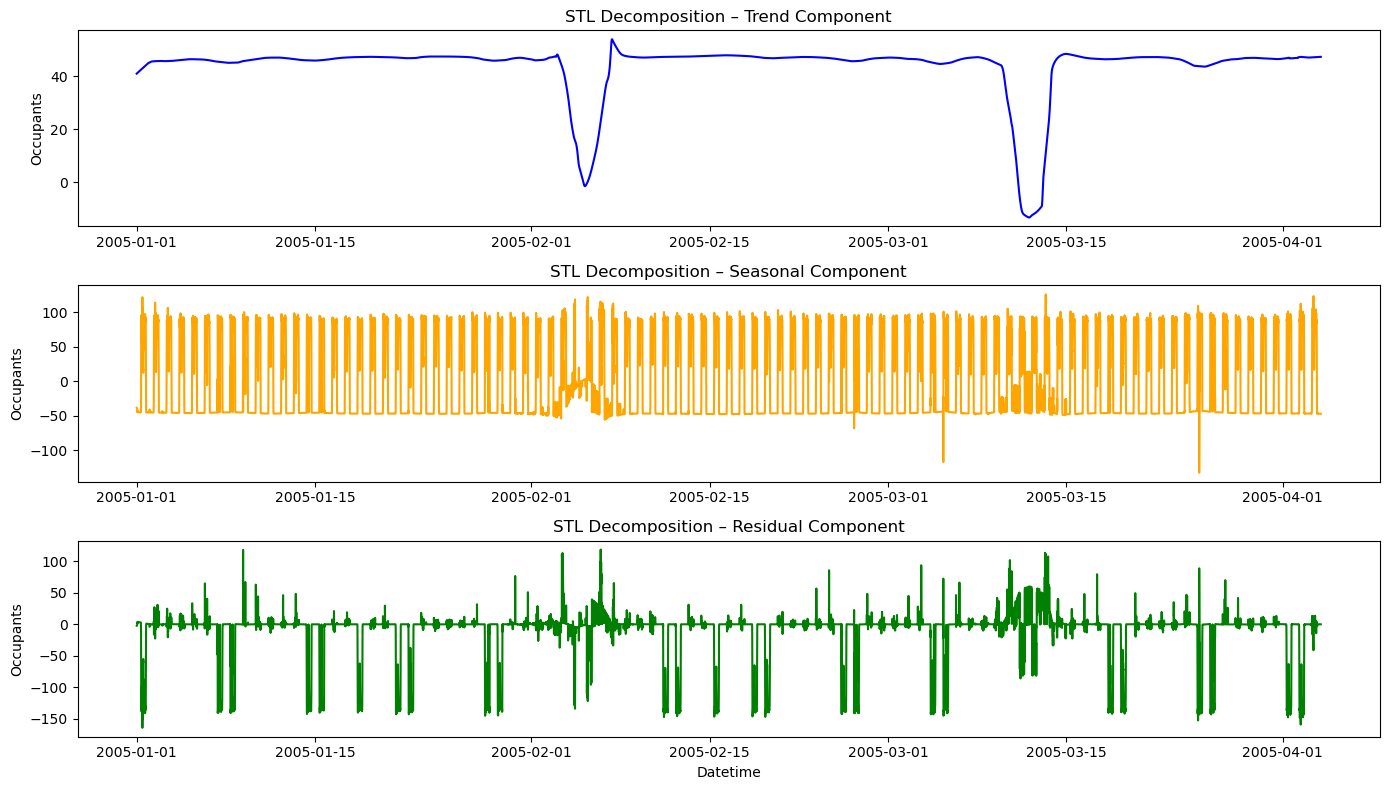

In [271]:
import matplotlib.pyplot as plt

# Plot the STL components
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(df.index, result.trend, label='Trend', color='blue')
plt.title("STL Decomposition – Trend Component")
plt.ylabel("Occupants")

plt.subplot(3, 1, 2)
plt.plot(df.index, result.seasonal, label='Seasonal', color='orange')
plt.title("STL Decomposition – Seasonal Component")
plt.ylabel("Occupants")

plt.subplot(3, 1, 3)
plt.plot(df.index, result.resid, label='Residual', color='green')
plt.title("STL Decomposition – Residual Component")
plt.ylabel("Occupants")
plt.xlabel("Datetime")

plt.tight_layout()
plt.show()


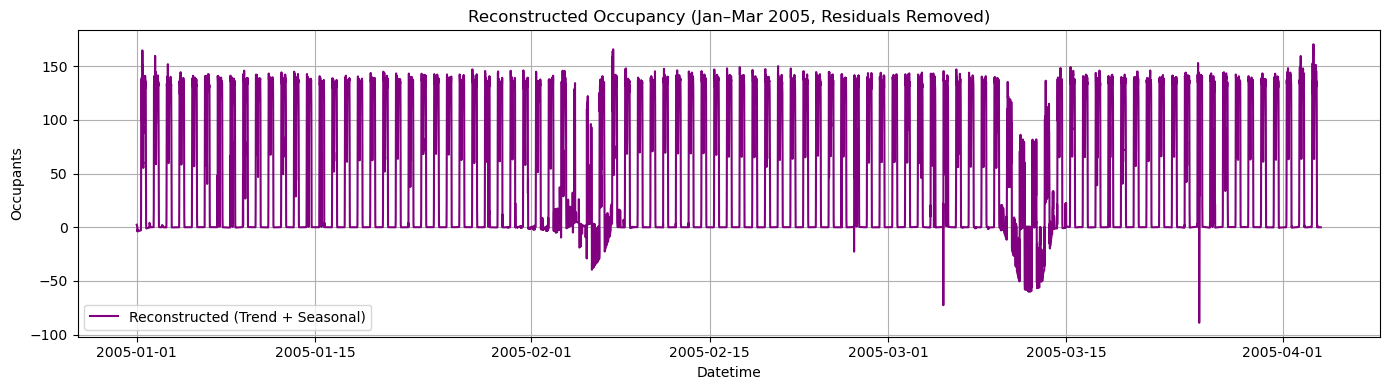

In [273]:
# Step 3: Drop residuals and reconstruct clean occupancy profile
clean_occupancy = result.trend + result.seasonal

# Plot the clean signal
plt.figure(figsize=(14, 4))
plt.plot(df.index, clean_occupancy, label='Reconstructed (Trend + Seasonal)', color='purple')
plt.title("Reconstructed Occupancy (Jan–Mar 2005, Residuals Removed)")
plt.xlabel("Datetime")
plt.ylabel("Occupants")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Average trend value: 43.80371762942844


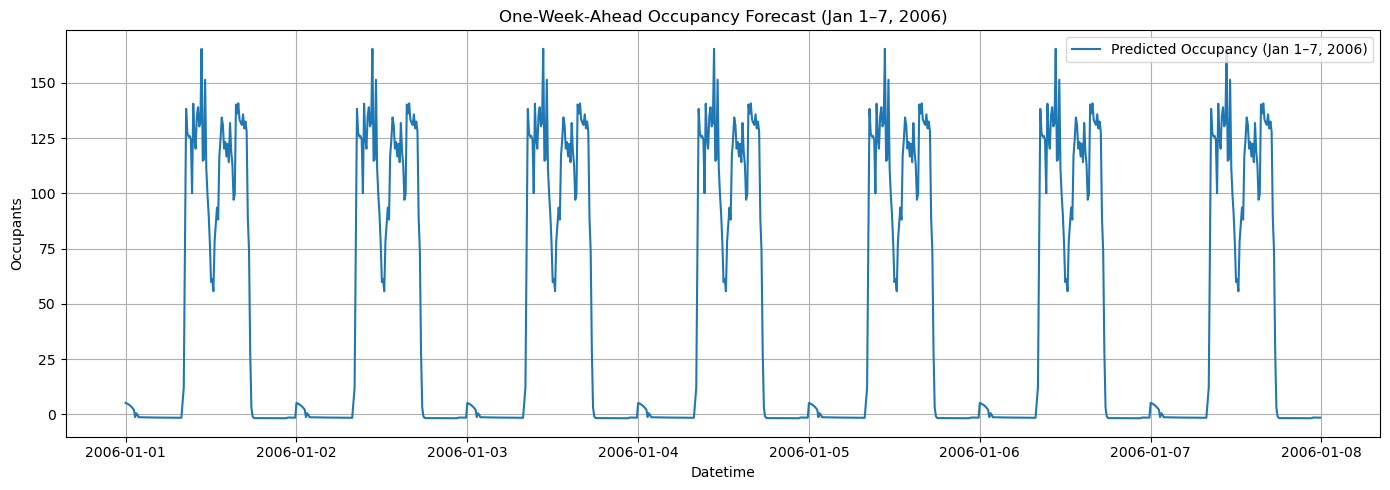

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 4: Average the trend component
avg_trend = result.trend.mean()
print(f"Average trend value: {avg_trend}")

# Step 4B: Repeat the seasonal pattern for 7 days
seasonal_pattern = result.seasonal[:144]  # One day = 144 points
seasonal_7days = np.tile(seasonal_pattern, 7)

# Step 4C: Add average trend to get forecast
forecast = seasonal_7days + avg_trend

# Create datetime index for Jan 1–7, 2006
forecast_index = pd.date_range(start="2006-01-01", periods=7*144, freq="10min")

# Step 4D: Plot forecast
plt.figure(figsize=(14, 5))
plt.plot(forecast_index, forecast, label="Predicted Occupancy (Jan 1–7, 2006)")
plt.title("One-Week-Ahead Occupancy Forecast (Jan 1–7, 2006)")
plt.xlabel("Datetime")
plt.ylabel("Occupants")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1848/3951905754.py:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


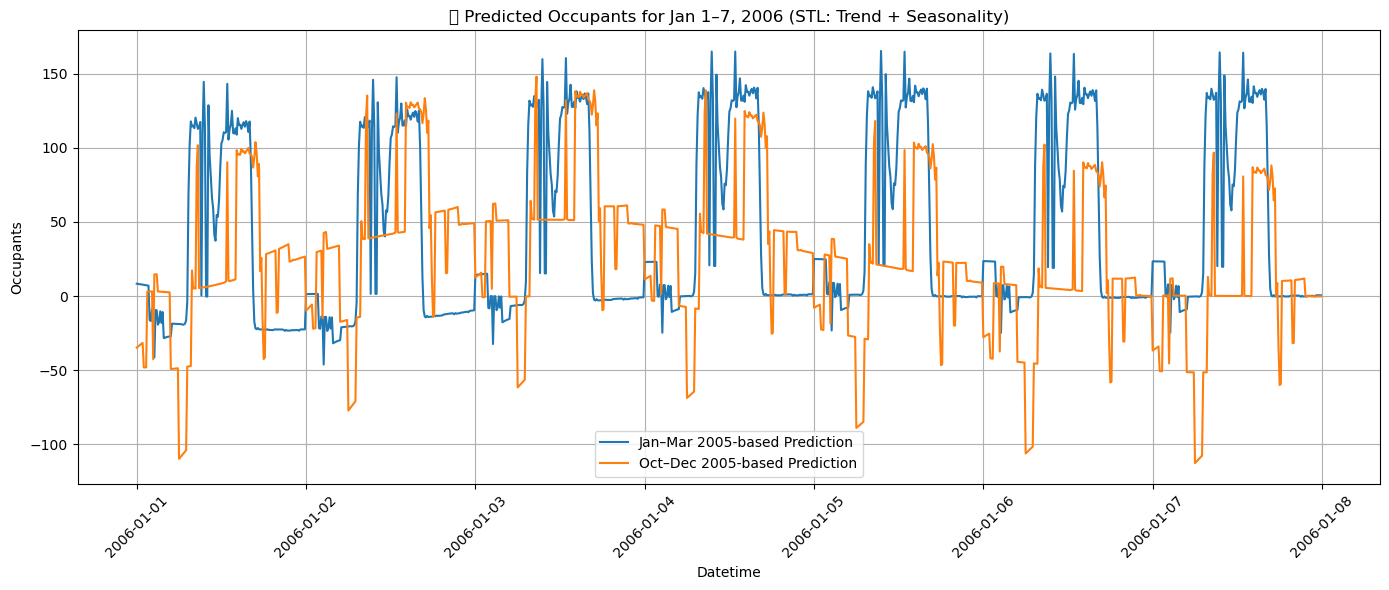

In [258]:
import h5py
import fsspec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Define file path
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
base_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/"
occupancy_path = base_path + "ZonePeopleOccupantCount/block1_values"

# Function to load data
def load_occupancy(start_idx, end_idx, start_date, periods):
    with fsspec.open(file_path, mode='rb', anon=True) as file:
        with h5py.File(file, 'r') as f:
            occupancy = f[occupancy_path][start_idx:end_idx]
            occupancy_total = occupancy.sum(axis=1)
    time_index = pd.date_range(start=start_date, periods=periods, freq="10min")
    df = pd.DataFrame({"datetime": time_index, "occupancy": occupancy_total})
    df.set_index("datetime", inplace=True)
    return df

# Load datasets
df_janmar = load_occupancy(0, 12960, "2005-01-01", 12960)
df_octdec = load_occupancy(-13104, None, "2005-10-01", 13104)

# STL prediction function
def decompose_and_predict(df, label):
    stl = STL(df["occupancy"], period=144, robust=True)
    result = stl.fit()
    seasonal = result.seasonal
    trend = result.trend

    # Repeat daily seasonality (144 intervals/day × 7)
    daily_seasonal = seasonal[-144:]
    future_seasonal = pd.concat([daily_seasonal] * 7, ignore_index=True)

    # Use last 7 days of trend
    future_trend = trend[-1008:].reset_index(drop=True)

    # Final prediction
    predicted_occupancy = future_trend + future_seasonal
    future_time = pd.date_range(start="2006-01-01", periods=1008, freq="10min")
    return pd.DataFrame({"datetime": future_time, f"predicted_occupants_{label}": predicted_occupancy})

# Predict for Jan 1–7, 2006 using both seasonal sources
jan2006_df_janmar = decompose_and_predict(df_janmar, "janmar")
jan2006_df_octdec = decompose_and_predict(df_octdec, "octdec")

# Merge both
combined = pd.merge(jan2006_df_janmar, jan2006_df_octdec, on="datetime")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(combined["datetime"], combined["predicted_occupants_janmar"], label="Jan–Mar 2005-based Prediction")
plt.plot(combined["datetime"], combined["predicted_occupants_octdec"], label="Oct–Dec 2005-based Prediction")
plt.title("📊 Predicted Occupants for Jan 1–7, 2006 (STL: Trend + Seasonality)")
plt.xlabel("Datetime")
plt.ylabel("Occupants")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


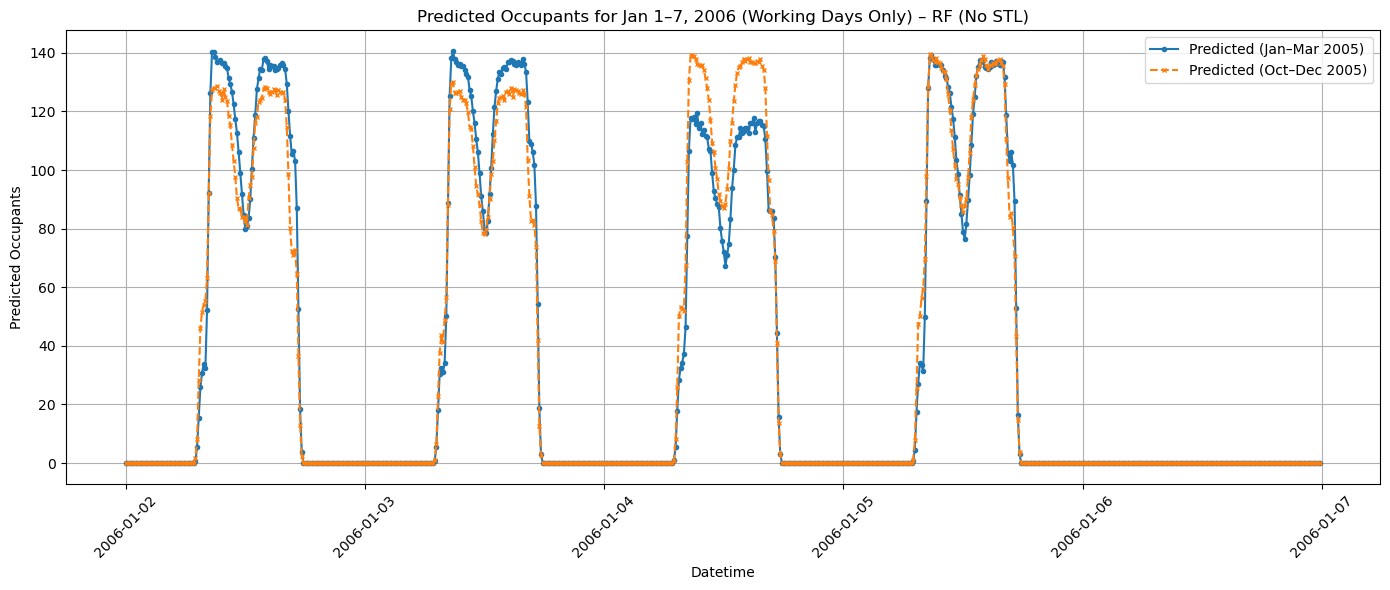

In [279]:
import h5py
import fsspec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# File paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"
daytype_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/SiteDayTypeIndex/block1_values"

# Intervals
rows_per_day = 144
rows_3months = 91 * rows_per_day

# Load full year to slice both Jan–Mar and Oct–Dec
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy_full = f[occupancy_path][:]  # full year
        daytype_full = f[daytype_path][:].flatten()

# Create datetime index for full 2005
start_time = pd.Timestamp("2005-01-01 00:00:00")
datetime_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(len(occupancy_full))]

# Full DF
df_full = pd.DataFrame({
    "datetime": datetime_index,
    "total_occupants": occupancy_full.sum(axis=1),
    "day_type_code": daytype_full
})
df_full["hour"] = df_full["datetime"].dt.hour
df_full["minute"] = df_full["datetime"].dt.minute

# Jan–Mar 2005
jan_mar_df = df_full[df_full["datetime"] < "2005-04-01"]
jan_mar_df = jan_mar_df[jan_mar_df["day_type_code"].isin([1, 2, 3, 4, 5])]

# Oct–Dec 2005
oct_dec_df = df_full[df_full["datetime"] >= "2005-10-01"]
oct_dec_df = oct_dec_df[oct_dec_df["day_type_code"].isin([1, 2, 3, 4, 5])]

# Train 2 models
X_jm = jan_mar_df[["hour", "minute", "day_type_code"]]
y_jm = jan_mar_df["total_occupants"]

X_od = oct_dec_df[["hour", "minute", "day_type_code"]]
y_od = oct_dec_df["total_occupants"]

model_jm = RandomForestRegressor(random_state=42)
model_jm.fit(X_jm, y_jm)

model_od = RandomForestRegressor(random_state=42)
model_od.fit(X_od, y_od)

# Future Jan 1–7, 2006
future_start = pd.Timestamp("2006-01-01 00:00:00")
future_datetimes = [future_start + pd.Timedelta(minutes=10) * i for i in range(1008)]
future_df = pd.DataFrame({"datetime": future_datetimes})
future_df["hour"] = future_df["datetime"].dt.hour
future_df["minute"] = future_df["datetime"].dt.minute
future_df["weekday"] = future_df["datetime"].dt.weekday

# Map weekday to SiteDayTypeIndex
weekday_to_type = {0: 2, 1: 3, 2: 4, 3: 5, 4: 1, 5: 6, 6: 7}
future_df["day_type_code"] = future_df["weekday"].map(weekday_to_type)

# Filter working days only
future_df = future_df[future_df["day_type_code"].isin([1, 2, 3, 4, 5])].copy()
X_future = future_df[["hour", "minute", "day_type_code"]]

# Predict from both models
future_df["pred_jan_mar"] = model_jm.predict(X_future)
future_df["pred_oct_dec"] = model_od.predict(X_future)

# Plot both predictions
plt.figure(figsize=(14, 6))
plt.plot(future_df["datetime"], future_df["pred_jan_mar"], label="Predicted (Jan–Mar 2005)", marker='o', markersize=3)
plt.plot(future_df["datetime"], future_df["pred_oct_dec"], label="Predicted (Oct–Dec 2005)", linestyle='--', marker='x', markersize=3)
plt.title("Predicted Occupants for Jan 1–7, 2006 (Working Days Only) – RF (No STL)")
plt.xlabel("Datetime")
plt.ylabel("Predicted Occupants")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


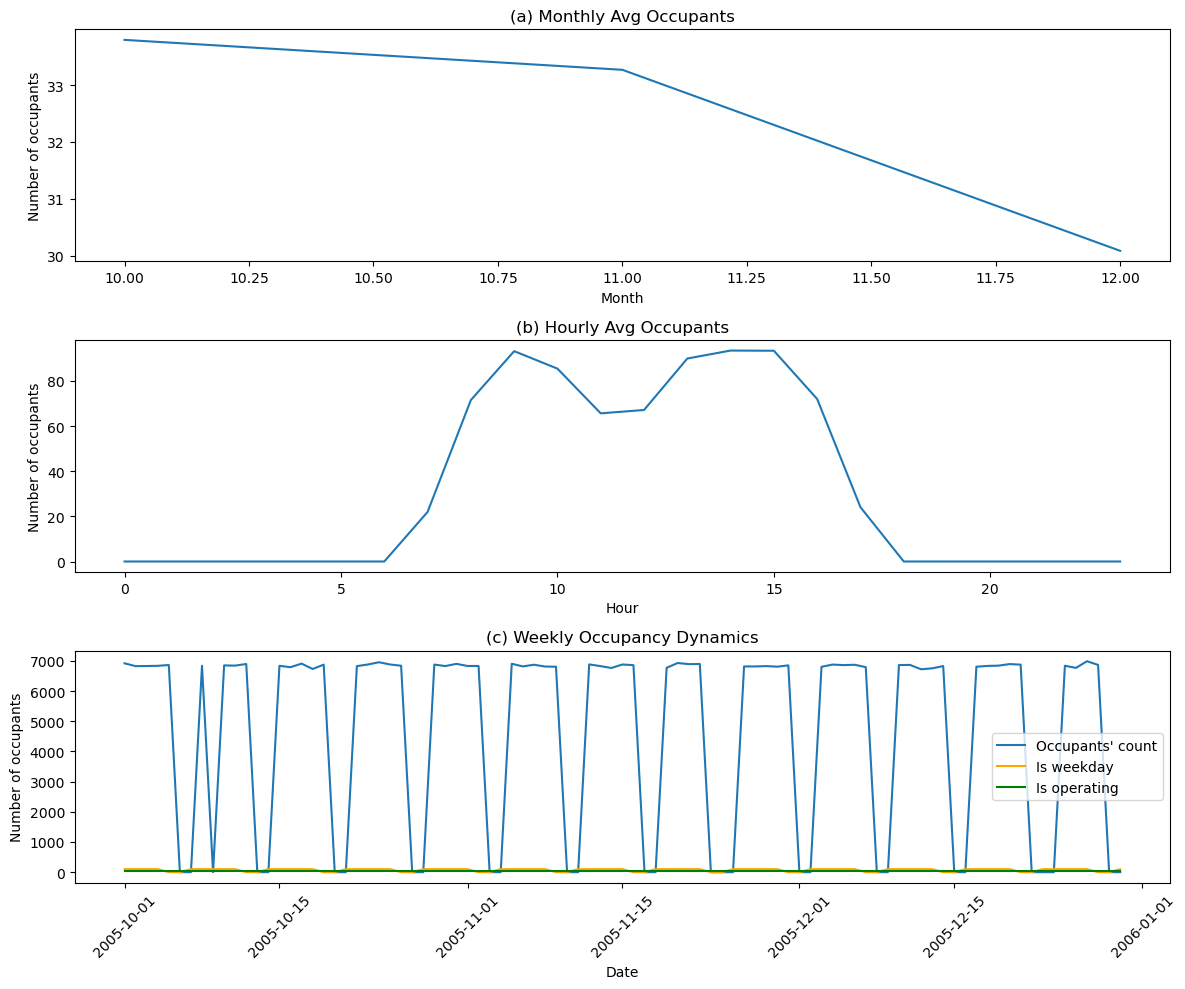

In [217]:
import h5py
import fsspec
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"
daytype_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/SiteDayTypeIndex/block1_values"

# Load last 3 months of data (13104 rows)
with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy = f[occupancy_path][-13104:]
        daytype = f[daytype_path][-13104:].flatten()

# Generate datetime index for 10-minute intervals starting Oct 1, 2005
start_time = pd.Timestamp("2005-10-01 00:00:00")
datetime_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(len(occupancy))]

# Create DataFrame
df = pd.DataFrame({
    "datetime": datetime_index,
    "total_occupants": occupancy.sum(axis=1),
    "day_type_code": daytype
})

# Feature engineering
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["date"] = df["datetime"].dt.date
df["is_weekday"] = df["day_type_code"].isin([1, 2, 3, 4, 5]).astype(int)
df["is_operating"] = df["hour"].between(8, 18).astype(int)  # 8 AM to 6 PM

# (a) Monthly average
monthly_avg = df.groupby("month")["total_occupants"].mean()

# (b) Hourly average
hourly_avg = df.groupby("hour")["total_occupants"].mean()

# (c) Daily
daily_df = df.groupby("date").agg({
    "total_occupants": "sum",
    "is_weekday": "mean",       # 1 if weekday, 0 if not
    "is_operating": "mean"      # 1 if within working hours
}).reset_index()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# (a) Monthly
axs[0].plot(monthly_avg.index, monthly_avg.values)
axs[0].set_title("(a) Monthly Avg Occupants")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Number of occupants")

# (b) Hourly
axs[1].plot(hourly_avg.index, hourly_avg.values)
axs[1].set_title("(b) Hourly Avg Occupants")
axs[1].set_xlabel("Hour")
axs[1].set_ylabel("Number of occupants")

# (c) Weekly
axs[2].plot(daily_df["date"], daily_df["total_occupants"], label="Occupants' count")
axs[2].plot(daily_df["date"], daily_df["is_weekday"] * 100, label="Is weekday", color='orange')
axs[2].plot(daily_df["date"], daily_df["is_operating"] * 100, label="Is operating", color='green')
axs[2].set_title("(c) Weekly Occupancy Dynamics")
axs[2].set_xlabel("Date")
axs[2].set_ylabel("Number of occupants")
axs[2].legend()
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


/tmp/ipykernel_1848/3191813587.py:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


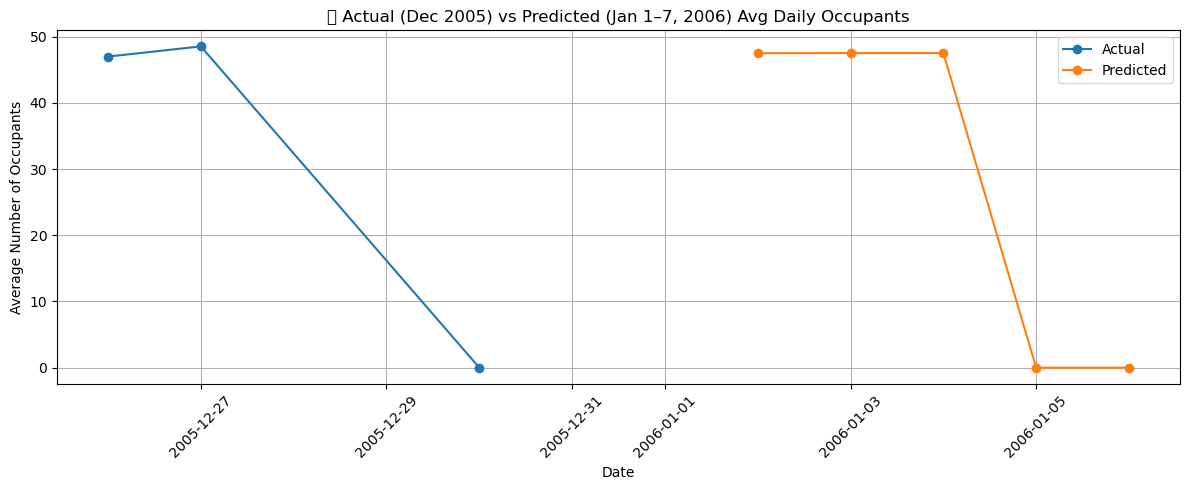

In [225]:
import h5py
import fsspec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load data (last 3 months of 2005)
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"
daytype_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/SiteDayTypeIndex/block1_values"

with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy = f[occupancy_path][-13104:]
        daytype = f[daytype_path][-13104:].flatten()

start_time = pd.Timestamp("2005-10-01 00:00:00")
datetime_index = [start_time + pd.Timedelta(minutes=10) * i for i in range(len(occupancy))]

df = pd.DataFrame({
    "datetime": datetime_index,
    "total_occupants": occupancy.sum(axis=1),
    "day_type_code": daytype
})
df["hour"] = df["datetime"].dt.hour
df["minute"] = df["datetime"].dt.minute
df["weekday"] = df["datetime"].dt.weekday
df["date"] = df["datetime"].dt.date

# Step 2: Filter working days (codes 1 to 5)
working_df = df[df["day_type_code"].isin([1, 2, 3, 4, 5])].copy()

# Step 3: Train model
X_train = working_df[["hour", "minute", "weekday"]]
y_train = working_df["total_occupants"]
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict Jan 1–7, 2006 (only weekdays)
future_dt = pd.date_range(start="2006-01-01", end="2006-01-08", freq="10T", inclusive="left")
future_df = pd.DataFrame({"datetime": future_dt})
future_df["hour"] = future_df["datetime"].dt.hour
future_df["minute"] = future_df["datetime"].dt.minute
future_df["weekday"] = future_df["datetime"].dt.weekday
future_df = future_df[future_df["weekday"] < 5]  # exclude weekends
future_df["predicted_occupants"] = model.predict(future_df[["hour", "minute", "weekday"]])
future_df["date"] = future_df["datetime"].dt.date

# Step 5: Aggregate predictions
predicted_daily = future_df.groupby("date")["predicted_occupants"].mean().reset_index()
predicted_daily["Source"] = "Predicted"
predicted_daily.rename(columns={"predicted_occupants": "avg_occupants"}, inplace=True)

# Step 6: Add recent actuals
recent_actual = working_df[working_df["datetime"] >= "2005-12-26"]
actual_daily = recent_actual.groupby("date")["total_occupants"].mean().reset_index()
actual_daily["Source"] = "Actual"
actual_daily.rename(columns={"total_occupants": "avg_occupants"}, inplace=True)

# Step 7: Combine and plot
combined_df = pd.concat([actual_daily, predicted_daily]).sort_values("date")

plt.figure(figsize=(12, 5))
for label, grp in combined_df.groupby("Source"):
    plt.plot(grp["date"], grp["avg_occupants"], marker='o', label=label)

plt.title("📊 Actual (Dec 2005) vs Predicted (Jan 1–7, 2006) Avg Daily Occupants")
plt.xlabel("Date")
plt.ylabel("Average Number of Occupants")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1 hour time interval - predicted occupancy jan 1-7 , 2006 using jan2005 data. (using STL)

/var/folders/s3/282ztbvj7cn5_w9yrtscw8ww0000gn/T/ipykernel_1084/4177737829.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts_hourly = ts_df.resample("H").mean()
/var/folders/s3/282ztbvj7cn5_w9yrtscw8ww0000gn/T/ipykernel_1084/4177737829.py:51: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_time = pd.date_range("2006-01-01 00:00:00", periods=24*7, freq="H")


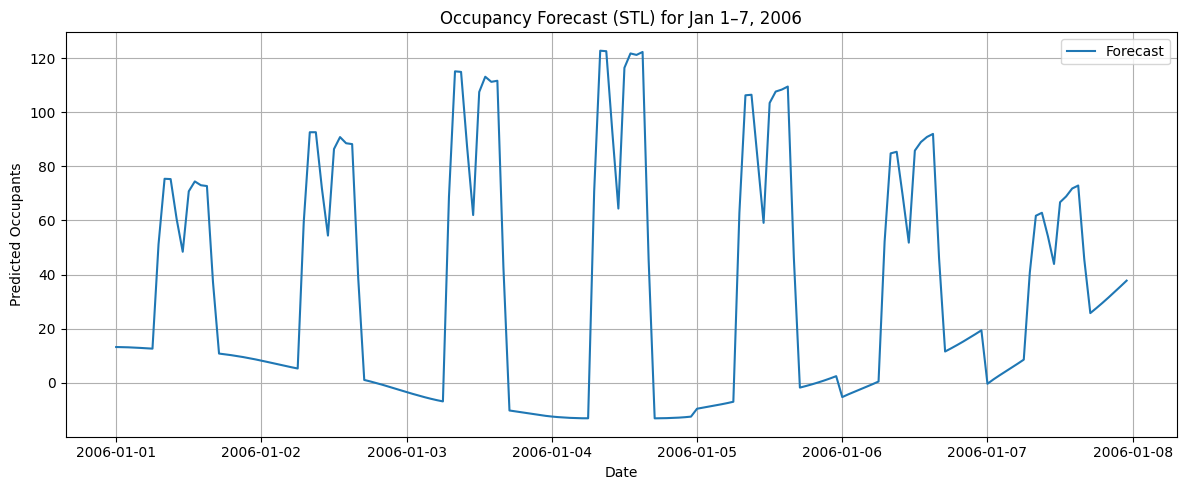

,datetime,predicted_occupants
0,2006-01-01 00:00:00,13.207859
1,2006-01-01 01:00:00,13.170608
2,2006-01-01 02:00:00,13.098827
3,2006-01-01 03:00:00,12.998543
4,2006-01-01 04:00:00,12.877747


In [19]:
import h5py
import fsspec
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- Step 1: Load Jan–Mar 2005 Occupancy Data ---
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy = f[occupancy_path][:13104]  # First 3 months (10-min interval)

# --- Step 2: Create Time Series ---
start_time = pd.Timestamp("2005-01-01 00:00:00")
timestamps = [start_time + pd.Timedelta(minutes=10) * i for i in range(occupancy.shape[0])]

ts_df = pd.DataFrame({
    "datetime": timestamps,
    "total_occupants": occupancy.sum(axis=1)
})
ts_df.set_index("datetime", inplace=True)

# --- Step 3: Resample to Hourly (to apply STL) ---
ts_hourly = ts_df.resample("H").mean()

# --- Step 4: Apply STL Decomposition ---
stl = STL(ts_hourly["total_occupants"], period=24)  # 24 hours = daily cycle
result = stl.fit()

# --- Step 5: Forecast Seasonality + Trend ---
# Repeat last week's seasonality (7 days × 24 = 168 values)
seasonality = result.seasonal[-24*7:]
forecast_seasonal = np.tile(seasonality.values, 1)  # 7 days forecast

# Forecast trend using linear regression
X = np.arange(len(result.trend)).reshape(-1, 1)
y = result.trend.values
model = LinearRegression().fit(X, y)

future_X = np.arange(len(result.trend), len(result.trend) + 24*7).reshape(-1, 1)
forecast_trend = model.predict(future_X)

# Combine trend + seasonal
forecast = forecast_trend + forecast_seasonal

# --- Step 6: Create Forecast DataFrame ---
forecast_time = pd.date_range("2006-01-01 00:00:00", periods=24*7, freq="H")
forecast_df = pd.DataFrame({
    "datetime": forecast_time,
    "predicted_occupants": forecast
})

# --- Optional: Plot Forecast ---
plt.figure(figsize=(12, 5))
plt.plot(forecast_df["datetime"], forecast_df["predicted_occupants"], label="Forecast")
plt.title("Occupancy Forecast (STL) for Jan 1–7, 2006")
plt.xlabel("Date")
plt.ylabel("Predicted Occupants")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Final Output ---
forecast_df.head()


In [20]:
# Save the forecast to CSV
forecast_df.to_csv("predicted_occupancy_jan1_7_2006.csv", index=False)


In [18]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 3.2 MB/s eta 0:00:0000:0100:01


Using 10-min time interval

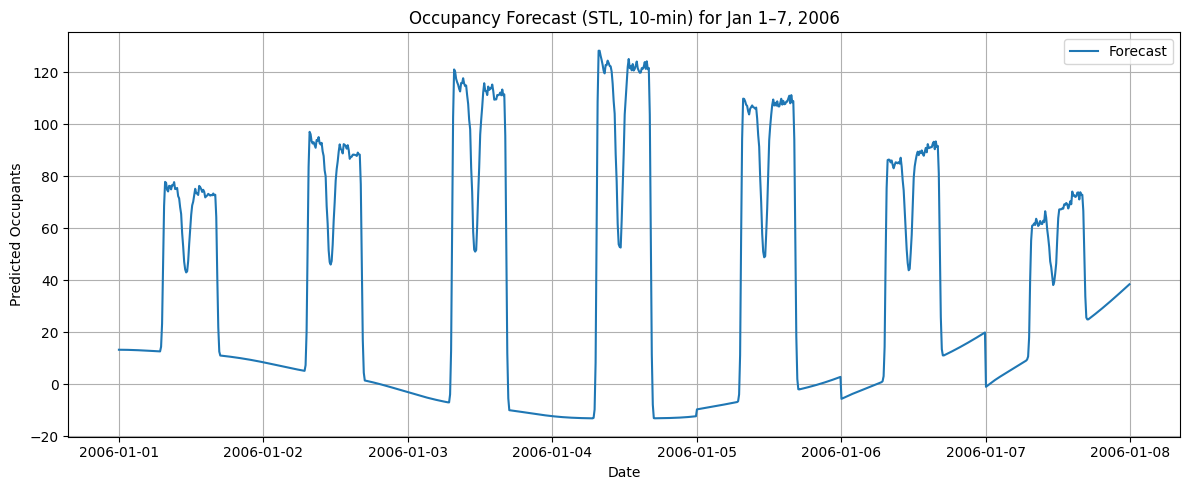

In [21]:
import h5py
import fsspec
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- Step 1: Load Jan–Mar 2005 Occupancy Data ---
file_path = "s3://oedi-data-lake/building_synthetic_dataset/A_Synthetic_Building_Operation_Dataset.h5"
occupancy_path = "3. Data/3.2. Timeseries/1A/Standard/2005/run_1/ZonePeopleOccupantCount/block1_values"

with fsspec.open(file_path, mode="rb", anon=True) as file:
    with h5py.File(file, "r") as f:
        occupancy = f[occupancy_path][:13104]  # First 3 months of 2005 (10-min interval)

# --- Step 2: Create Time Series ---
start_time = pd.Timestamp("2005-01-01 00:00:00")
timestamps = [start_time + pd.Timedelta(minutes=10) * i for i in range(occupancy.shape[0])]

ts_df = pd.DataFrame({
    "datetime": timestamps,
    "total_occupants": occupancy.sum(axis=1)
})
ts_df.set_index("datetime", inplace=True)

# --- Step 3: Apply STL to 10-min Data ---
# Daily seasonality = 144 points (24 hours * 6 per hour)
stl = STL(ts_df["total_occupants"], period=144)
result = stl.fit()

# --- Step 4: Forecast Seasonality + Trend (for 7 days = 144 * 7 = 1008 steps) ---
seasonality = result.seasonal[-144*7:]  # 7 days
forecast_seasonal = np.tile(seasonality.values, 1)

# Trend via linear regression
X = np.arange(len(result.trend)).reshape(-1, 1)
y = result.trend.values
model = LinearRegression().fit(X, y)

future_X = np.arange(len(result.trend), len(result.trend) + 144*7).reshape(-1, 1)
forecast_trend = model.predict(future_X)

forecast = forecast_trend + forecast_seasonal

# --- Step 5: Create Forecast DataFrame (10-min interval) ---
forecast_time = pd.date_range("2006-01-01 00:00:00", periods=144*7, freq="10min")
forecast_df = pd.DataFrame({
    "datetime": forecast_time,
    "predicted_occupants": forecast
})

# --- Step 6: Save to CSV ---
forecast_df.to_csv("predicted_occupancy_jan1_7_2006_10min.csv", index=False)

# Optional: Plot
plt.figure(figsize=(12, 5))
plt.plot(forecast_df["datetime"], forecast_df["predicted_occupants"], label="Forecast")
plt.title("Occupancy Forecast (STL, 10-min) for Jan 1–7, 2006")
plt.xlabel("Date")
plt.ylabel("Predicted Occupants")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
